In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tarfile
from mpl_toolkits.mplot3d import Axes3D
import glob
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D

# Loading the Data and Standardizing the Resolutions

In [2]:
# load the tar file
tar_path = '/Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00.tar'
tar_path


'/Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00.tar'

In [3]:
with tarfile.open(tar_path, 'r') as tar:
    # Get a list of all members in the archive
    members = tar.getmembers()

    # Slice the list to get the first 100 members
    first_100_members = members[:101]

    # Extract the first 100 members to current directory
    tar.extractall(members=first_100_members)


In [4]:
jpg_files = glob.glob(
    '/Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/*.jpg')


In [5]:
len(jpg_files)


100

In [ ]:
for filename in jpg_files:
    with Image.open(filename) as img:
        print(f"Image resolution for {filename}: {img.size}")


```
Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/UZIJ149HLU.jpg: (1024, 1024)
Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/IGSU2ZYVXE.jpg: (1024, 1024
```

In [7]:
jpg_files = glob.glob(
    '/Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/*.jpg')


In [8]:
# resize the images
for filename in jpg_files:
    with Image.open(filename) as img:
        resized_img = img.resize((128, 128))

        resized_img.save(filename)

print("All images resized successfully!")


All images resized successfully!


In [ ]:
for filename in jpg_files:
    with Image.open(filename) as img:
        print(f"Image resolution for {filename}: {img.size}")


```
Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/D3MJTY12U7.jpg: (128, 128)
Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/UZIJ149HLU.jpg: (128, 128)
```

In [10]:
# store these images in a list
fake_img_lst = []

for filename in jpg_files:
    with Image.open(filename) as img:
        fake_img_lst.append(img)

# check the length of the list
len(fake_img_lst)


100

In [11]:
true_face_path = '/Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/Data/Train/*.png'
# read in the first 100 images
true_img_lst = []

for filename in glob.glob(true_face_path)[:100]:
    with Image.open(filename) as img:
        # convert to jpg
        img = img.convert('RGB')
        # resize the image
        img = img.resize((128, 128))

        true_img_lst.append(img)

# check the length of the list
len(true_img_lst)


100

In [ ]:
# check the resolution of the images
for img in true_img_lst:
    print(f"Image resolution: {img.size}")


```
Image resolution: (128, 128)
```

In [13]:
assert true_img_lst[0].size == fake_img_lst[0].size

# check all the images have the same resolution
for img in true_img_lst:
    assert img.size == true_img_lst[0].size


# EDA (Data Exploration and Visualization)

In [14]:
import random


### True faces (visualize the random 30 images)

```

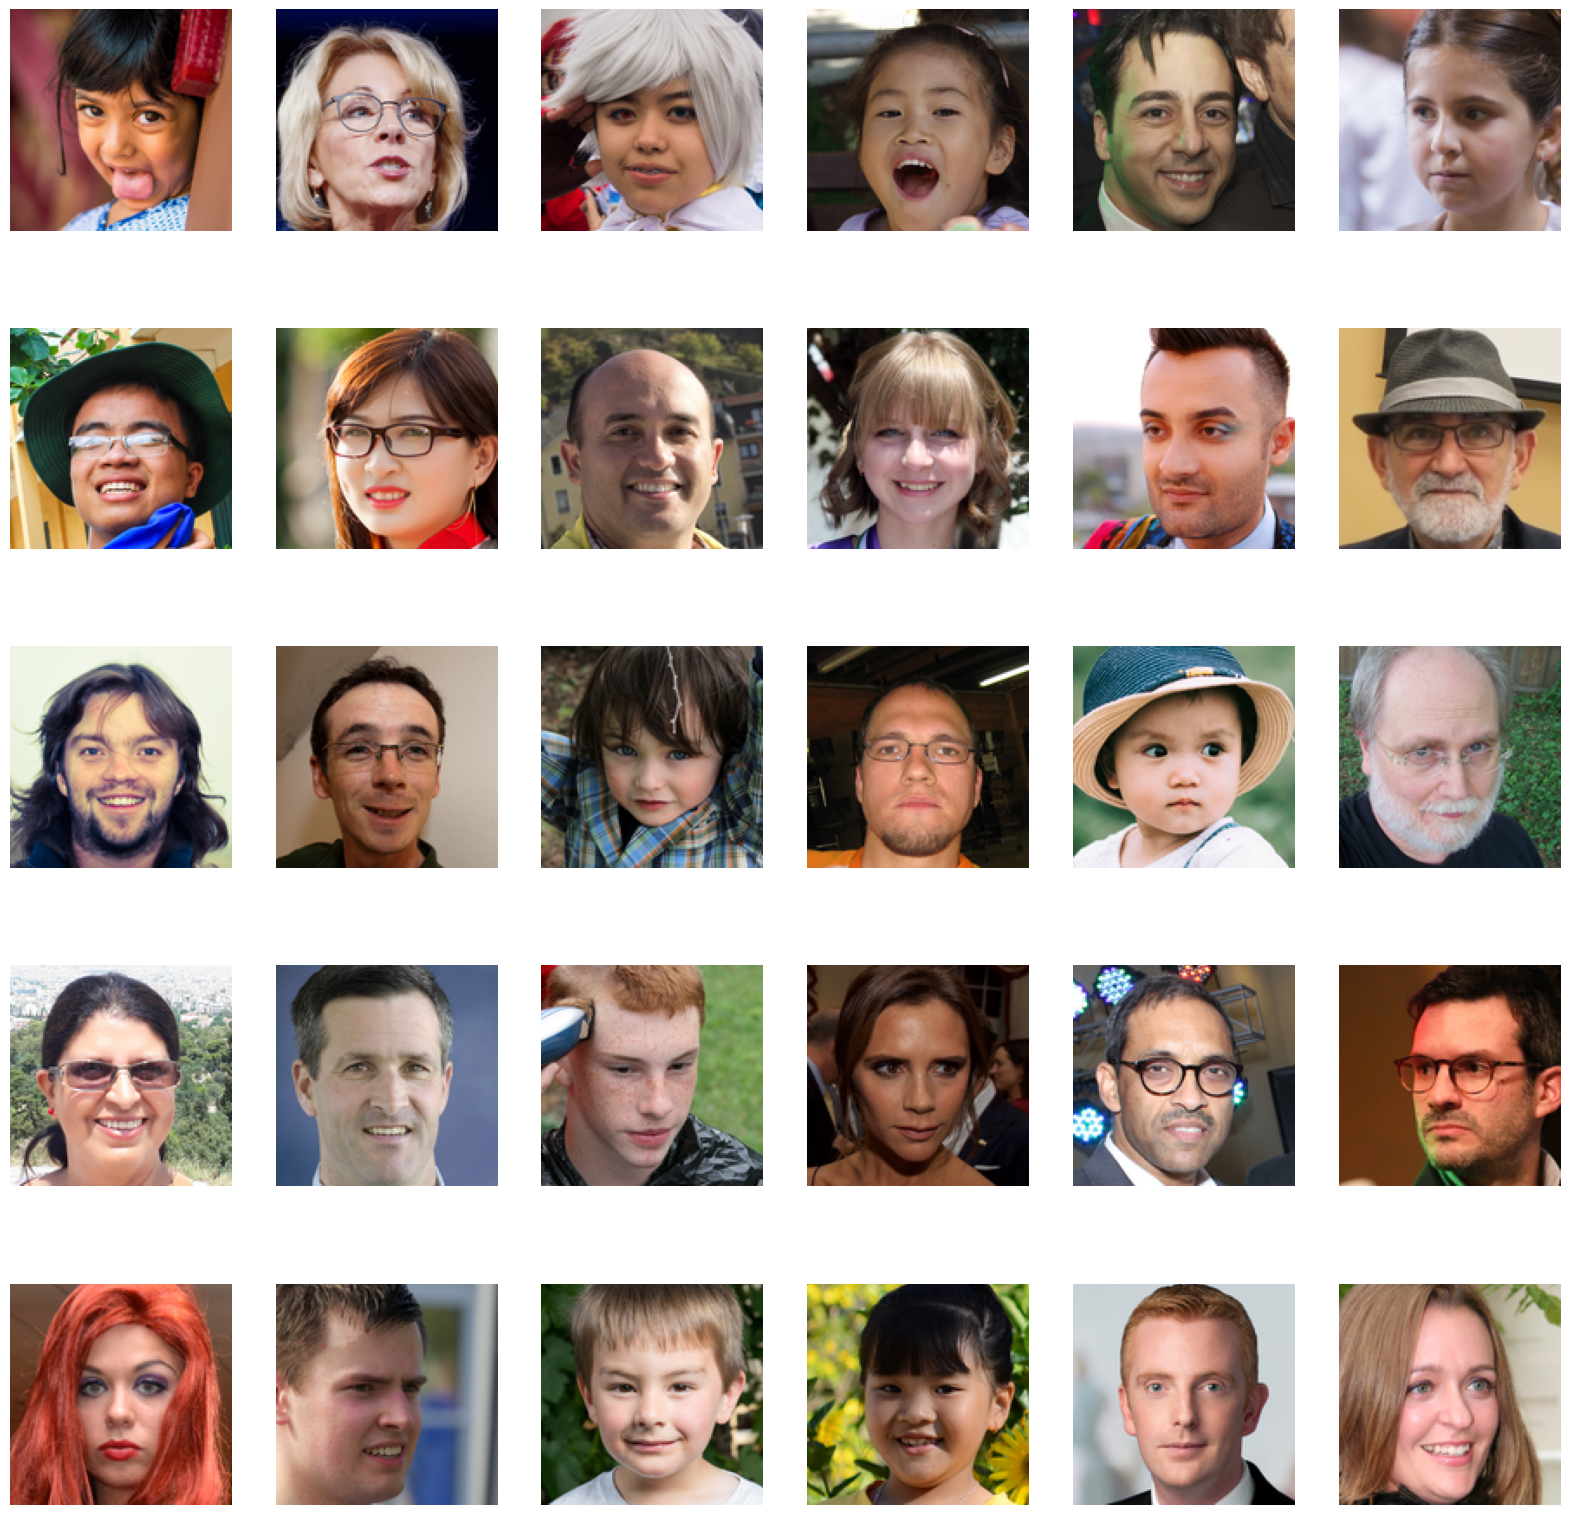

In [15]:
selected_files_true = random.sample(true_img_lst, 30)
# selected_files_true
# visualize the randomly selected images:30 for true images
fig, ax = plt.subplots(5, 6, figsize=(20, 20))

for i in range(5):
    for j in range(6):
        ax[i, j].imshow(selected_files_true[i*6 + j])
        ax[i, j].axis('off')

plt.show()


In [16]:
# get the type of the images
type(true_img_lst[0])


PIL.Image.Image

> Here is a sample of 30 true faces from the dataset. The race distribution is not even. There are more white faces than black faces and asian faces.

### False faces (visualize the random 30 images)


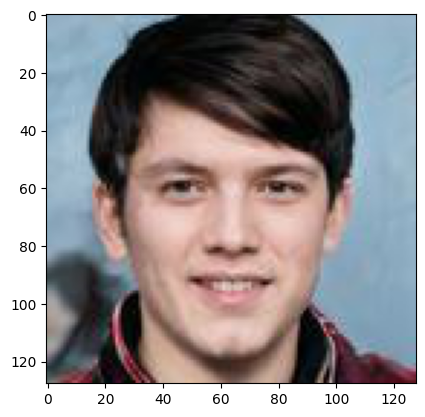

In [17]:
test_fake_path = '/Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/1B4CRR0ERM.jpg'

jpeg_image = Image.open(test_fake_path)

plt.imshow(jpeg_image)
plt.show()


In [18]:
# get path from the folder
fake_img_path = '/Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/*.jpg'
# get all the path of the images
fake_img_path_lst = glob.glob(fake_img_path)
# get the first 100 images
fake_img_path_lst = fake_img_path_lst[:100]
# check the length of the list
len(fake_img_path_lst)


100

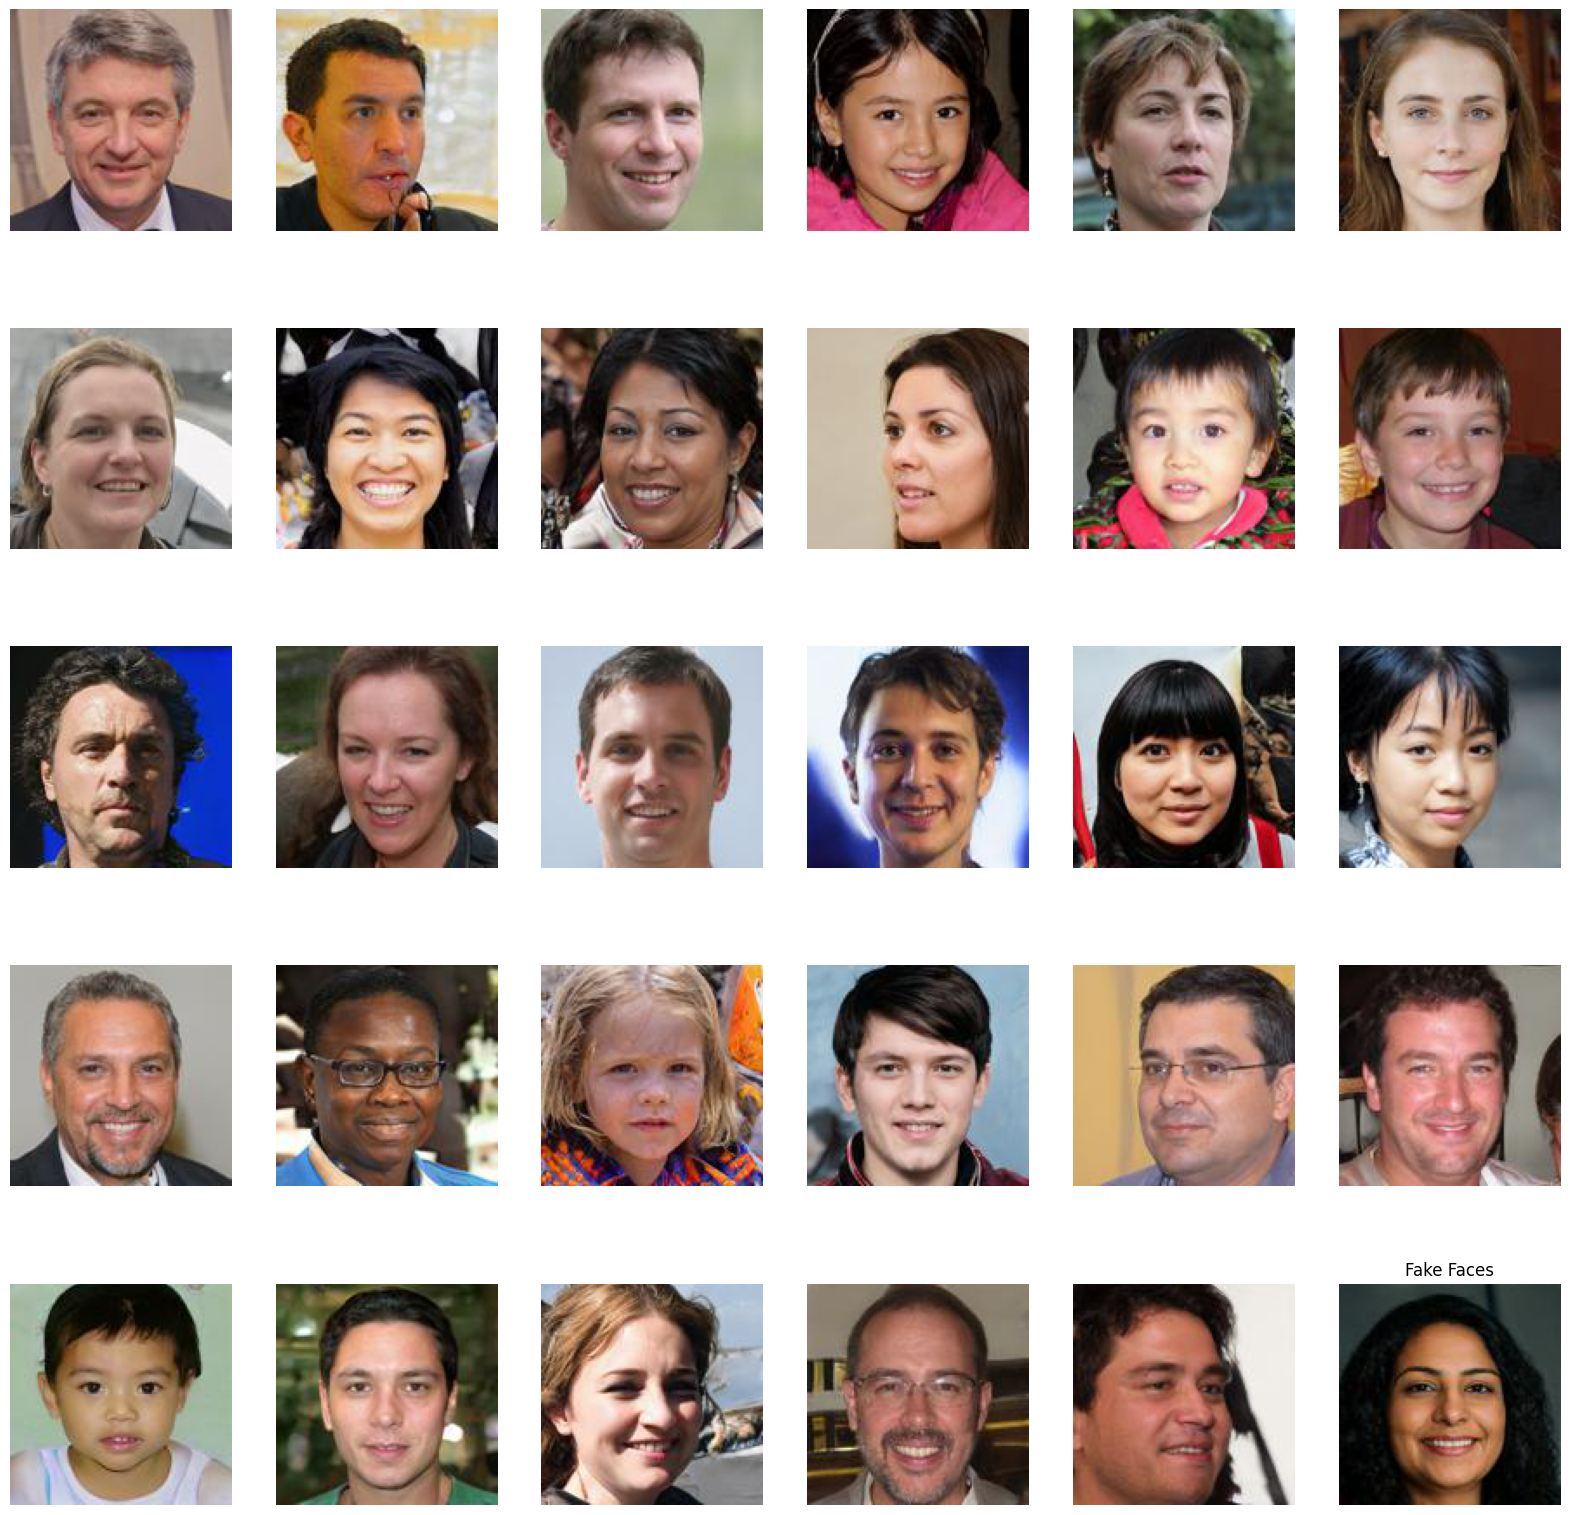

In [19]:
selected_fake_faces = random.sample(fake_img_path_lst, 30)
selected_fake_faces

# visualize the randomly selected images:30 for fake images
fig, ax = plt.subplots(5, 6, figsize=(20, 20))

for i in range(5):
    for j in range(6):
        ax[i, j].imshow(Image.open(selected_fake_faces[i*6 + j]))
        ax[i, j].axis('off')

plt.title('Fake Faces')
plt.show()


> By visually inspecting the images, we can see that the images are highly similar to the real faces. We are taking a random sampling of 30 each time. Thus it gives us a good idea of the data.

In [20]:
# import os
# from PIL import Image

# # Set the directory containing the PNG images
# png_dir = '/Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00'

# # Loop through all PNG files in the directory
# for filename in os.listdir(png_dir):
#     if filename.endswith('.png'):
#         # Open the PNG image using PIL
#         png_image = Image.open(os.path.join(png_dir, filename))

#         # Convert the PNG image to the RGB format
#         rgb_image = png_image.convert('RGB')

#         # Save the RGB image to a file
#         rgb_image.save(os.path.join(png_dir, filename.replace('.png', '_rgb.png')))


In [21]:
len(true_img_lst)


100

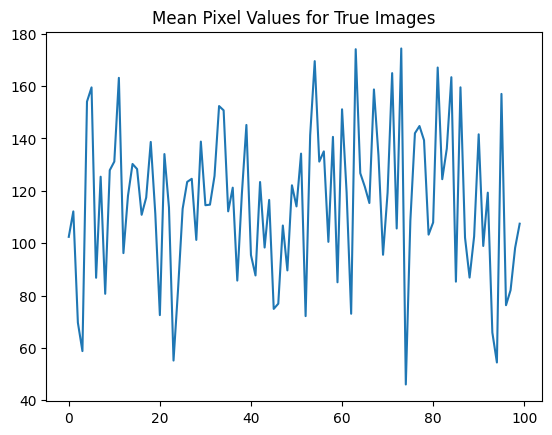

In [22]:
# get the mean pixel values for each image
mean_pixel_values = []

for img in true_img_lst:
    mean_pixel_values.append(np.mean(img))

# plot the mean pixel values
plt.plot(mean_pixel_values)
plt.title('Mean Pixel Values for True Images')
plt.show()


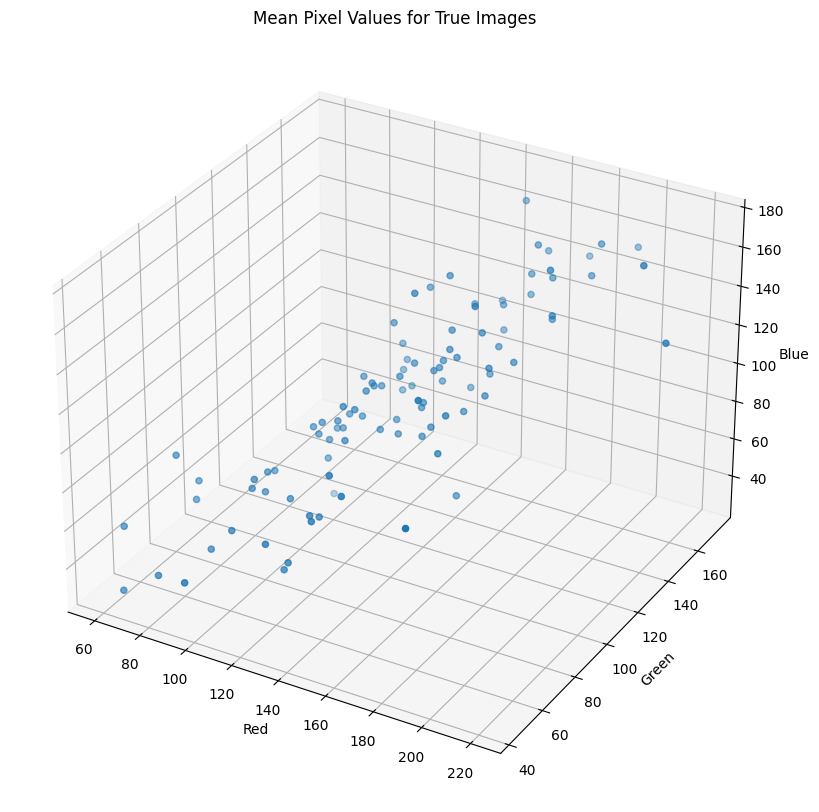

In [23]:
# get mean pixel values for real images in a 3 channel format in a 3D plot
mean_pixel_values = []

for img in true_img_lst:
    mean_pixel_values.append(np.mean(img, axis=(0, 1)))

mean_pixel_values = np.array(mean_pixel_values)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mean_pixel_values[:, 0],
           mean_pixel_values[:, 1], mean_pixel_values[:, 2])
plt.title('Mean Pixel Values for True Images')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
fig.set_size_inches(10, 10)
plt.show()


In [24]:
# get pixel value of the first image in the fake image list
Image.open(fake_img_path_lst[0])
# get the 3 channels pixel values of the image
r, g, b = Image.open(fake_img_path_lst[0]).split()
# Image.open(fake_img_path_lst[0]).split()
# np.mean(Image.open(fake_img_path_lst[0]))
# get the three channels of the image with numerical values
r_arr = np.array(r)
g_arr = np.array(g)
b_arr = np.array(b)
# get the mean pixel values for each channel
r_mean = np.mean(r_arr)
g_mean = np.mean(g_arr)
b_mean = np.mean(b_arr)


In [25]:
# Initialize empty arrays to hold pixel values for each channel
r_arr = np.array([])
g_arr = np.array([])
b_arr = np.array([])

# Loop over each image in the list of fake image paths
for img_path in fake_img_path_lst:
    # Open the image using the PIL Image class
    img = Image.open(img_path)
    # Split the image into its red, green, and blue channels
    r, g, b = img.split()
    # Convert each channel to a NumPy array
    r_arr_img = np.array(r)
    g_arr_img = np.array(g)
    b_arr_img = np.array(b)
    # Append the arrays for each channel to the corresponding global array
    r_arr = np.concatenate((r_arr, r_arr_img.flatten()))
    g_arr = np.concatenate((g_arr, g_arr_img.flatten()))
    b_arr = np.concatenate((b_arr, b_arr_img.flatten()))

# Calculate the mean pixel values for each channel
r_mean = np.mean(r_arr)
g_mean = np.mean(g_arr)
b_mean = np.mean(b_arr)

# Print the mean pixel values for each channel
print("Red channel mean:", r_mean)
print("Green channel mean:", g_mean)
print("Blue channel mean:", b_mean)


Red channel mean: 130.71833374023439
Green channel mean: 107.35384033203125
Blue channel mean: 96.16933837890625


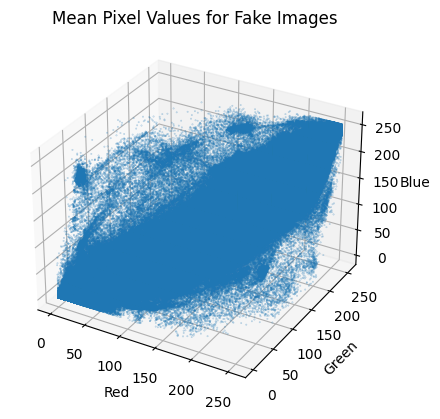

In [26]:
# plot a 3d plot of the mean pixel values for each channel
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(r_arr, g_arr, b_arr, alpha=0.4, s=0.1)
plt.title('Mean Pixel Values for Fake Images')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()


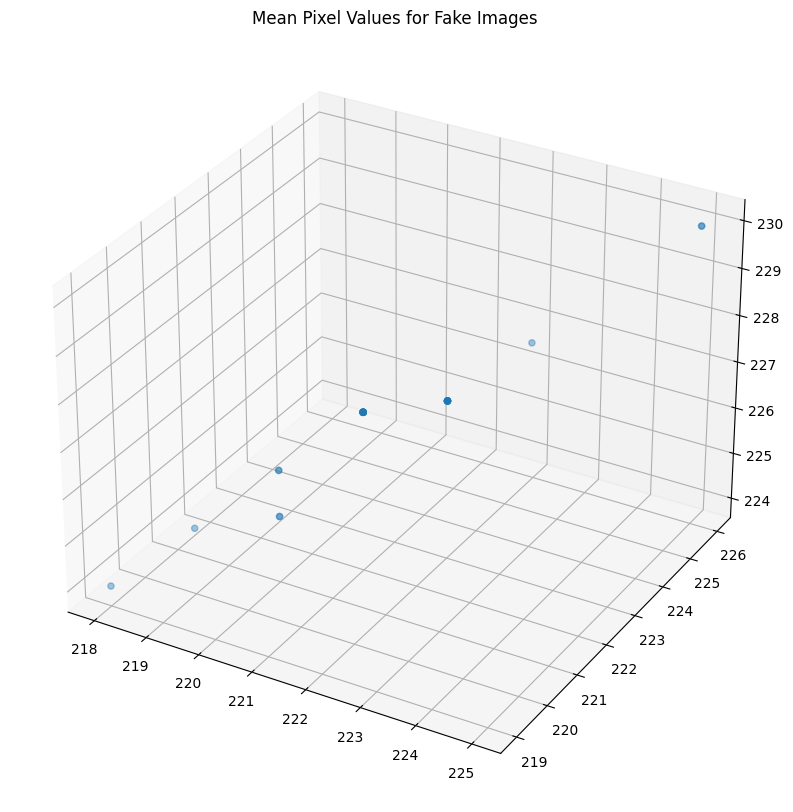

In [27]:
# get three channels subset of the images
r_arr_new = r_arr[:30]
g_arr_new = g_arr[:30]
b_arr_new = b_arr[:30]

# plot a 3d plot of the mean pixel values for each channel
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(r_arr_new, g_arr_new, b_arr_new, alpha=0.4)
plt.title('Mean Pixel Values for Fake Images')
plt.show()
